# Assignment 2

## Objective of this assignment
The objective of this assignment is to get an understanding of the many ways data can be visualized. Upon completing this exercise you should be familiar with histograms, boxplots and scatter plots.


## ** Important: ** When handing in your homework:
+ Hand in the notebook **and nothing else** named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ **From this week on, we will deduct a point if you zip/tar/archive the notebook, especially if you include the data folder!** 
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Brightspace.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ Use the Brightspace discussion board or email the student assistants for questions on how to complete the exercises.
+ If you find mistakes/have suggestions/would like to complain about the assigment material itself, please email me [Lisa] at `l.tostrams@science.ru.nl`


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 3.3
- Jonathon Shlens, *A tutorial on Principal Component Analysis* , https://arxiv.org/abs/1404.1100


## 2.1 Visualizing wine data (4.5 points)

In this part of the exercise we will consider two data sets related to red and white variants of the Portuguese "Vinho Verde" wine[1]. The data has been downloaded from http://archive.ics.uci.edu/ml/datasets/Wine+Quality. Only physicochemical and sensory attributes are available, i.e., there is no data about grape types, wine brand, wine selling price, etc. The data has the following attributes:

| #   |  Attribute      | Unit |
| --- |:--------------- |:---- |
| 1   | Fixed acidity (tartaric) | g/dm3 |
| 2   | Volatile acidity (acetic) | g/dm3 |
| 3   | Citric acid | g/dm3 |
| 4   | Residual sugar | g/dm3 |
| 5   | Chlorides | g/dm3 |
| 6   | Free sulfur dioxide | mg/dm3 |
| 7   | Total sulfur dioxide | mg/dm3 |
| 8   | Density | g/cm3 |
| 9   | pH | pH |
| 10  | Sulphates | g/dm3 |
| 11  | Alcohol | % vol. |
| 12  | Quality score | 0-10 |

Attributes 1-11 are based on physicochemical tests and attribute 12 on human judging. The data set has many observations that can be considered outliers and in order to carry out analyses it is important to remove the corrupt observations.

The aim of this exercise is to use visualization to identify outliers and remove these outliers from the data. It might be necessary to remove some outliers before other outlying observations become visible. Thus, the process of finding and removing outliers is often iterative. The wine data is stored in a MATLAB file, `Data/wine.mat`

*This exercise is based upon material kindly provided by the Cognitive System Section, DTU Compute,
http://cogsys.compute.dtu.dk. Any sale or commercial distribution is strictly forbidden.*

> 2.1.1a) (3pts)
1. Load the data into Python using the `scipy.io.loadmat()` function. 
2. This data set contains many observations that can be considered outliers. Plot a box plot and a histogram for each attribute to visualize the outliers in the data set. Use subplotting to nicely visualize these plots.
3. From prior knowledge we expect volatile acidity to be around 0-2 g/dm3, density to be close to 1 g/cm3, and alcohol percentage to be somewhere between 5-20% vol. We can safely identify the outliers for these attributes, searching for the values, which are a factor of 10 greater than the largest we expect. Identify outliers for volatile acidity, density and alcohol percentage, and remove them from the data set. This means that you should remove the entire sample from the dataset, not just for that attribute!
4. Plot new box plots and histograms for these attributes and compare them with initial ones.

> 
 + *You can use the `scipy.stats.zscore()` to standardize your data before you plot a boxplot.*
 + *You can use logical indexing to easily make a new dataset (for example $X\_filtered$, where the outliers are removed. This is much easier, and faster than methods like dropping, or selecting using a for loop or list comprehension. For more information, see: https://docs.scipy.org/doc/numpy-1.13.0/user/basics.indexing.html Take a look at the -Boolean or "mask" index arrays- section.*
 + *You can use the function `matplotlib.pyplot.subplots()` to plot several plots in one figure. A simple example an be found at: https://matplotlib.org/2.0.2/examples/pylab_examples/subplots_demo.html, take a look at the 2D subplot specifically. There is also an example of a subplot in the first assignment. If you're handy, you can devise a for loop which fills up the subplot area!* 
 + *The object in wine.mat is a dictionary. The attributes are stored in matrix $X$. Attribute names and class names are stored in the attributeNames object, which contain arrays, of which the first element contains the names*

**Make sure to take a look at the documentation of functions before you try and use them!**


(6497, 12)
6491
6344
6304


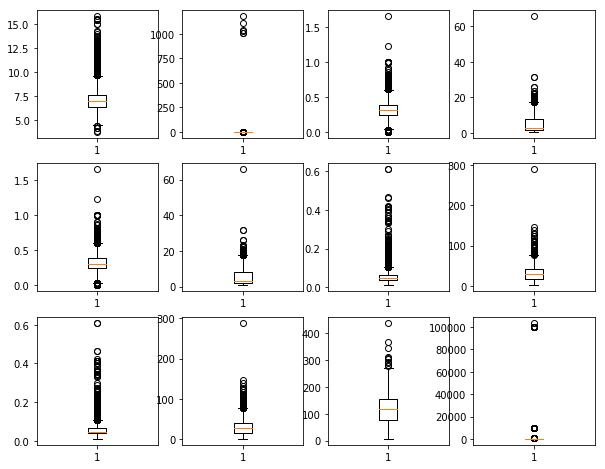

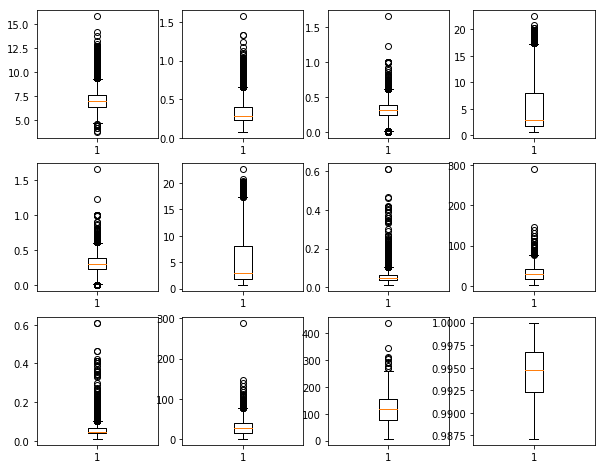

In [40]:
from os.path import dirname, join as pjoin
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
X = sio.loadmat('./Data/wine.mat')
#print(X.keys())
#print(X['X'])

#because of the shape we thought we had to transpose

nparray = np.array(X['X'])
#nparray.transpose()
print(np.shape(nparray))

f, ax = plt.subplots(3, 4, figsize = (10, 8))
for i in range (len(ax)):
    for j in range (len(ax[i])):
        ax[i][j].boxplot(nparray[:,((i*(len(ax)-1)) + j )])
        
ids = np.where(nparray[:, 1] <= 20)
nparray = nparray[ids]
print(len(nparray))
ids = np.where(nparray[:, 7] <= 10)
nparray = nparray[ids]
print(len(nparray))
ids = np.where(nparray[:, 10] <= 200)
nparray = nparray[ids]
print(len(nparray))

f, ax = plt.subplots(3, 4,  figsize = (10, 8))
for i in range (len(ax)):
    for j in range (len(ax[i])):
        ax[i][j].boxplot(nparray[:,((i*(len(ax)-1)) + j )])

#f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12) = plt.subplots(1, 12, sharey = True) 
#ax1.boxplot(nparray[0])
#ax2.boxplot(nparray[1])
#ax3.boxplot(nparray[2])
#ax4.boxplot(nparray[3])
#ax5.boxplot(nparray[4])
#ax6.boxplot(nparray[5])
#ax7.boxplot(nparray[6])
#ax8.boxplot(nparray[7])
#ax9.boxplot(nparray[8])
#ax10.boxplot(nparray[9])
#ax11.boxplot(nparray[10])
#ax12.boxplot(nparray[11])
#for p in  nparray:
 #   ax.plot()


----


----

> 2.1.1b (0.5pts)
Why do we need to standardize the data after removing the outliers? Give the -statistical- reason, not just the practical reason. 

----

With standardization, we put different variables on the same scale. This enables us to compare the values of different kinds of variables. After having removed the outliers, the scale may have changed a bit. This is the reason why we then have to apply standardization. 

----

> 2.1.2 (1pt) Make scatter plots between attributes and wine quality as rated by human judges. Can you manually identify any clear relationship between the attributes of the wine and wine quality? Which values of these attributes are associated with high quality wine? Use the correlation coefficients to substantiate your answers. Make sure to use the data where the outliers are removed 
+ *You can calculate the correlation coefficient using the `scipy.stats.pearsonr()` function to measure the strength of association.*

0 : (-0.07668526520453652, 1.0847899728777514e-09)
1 : (-0.26230590578350776, 1.0724803118587711e-99)
2 : (0.0890221181546118, 1.4330992086587045e-12)
3 : (-0.03215392730963386, 0.010676798571678045)
4 : (-0.19914164479762572, 2.1198960802505528e-57)
5 : (0.05516006485585848, 1.1756681578183794e-05)
6 : (-0.03971034037910721, 0.0016130889003013028)
7 : (-0.3196176972872714, 1.0807901465291248e-149)
8 : (0.02030807915814118, 0.10690494956698367)
9 : (0.03798453783414721, 0.0025581529729373307)
10 : (0.4495415274503276, 2.570682201516e-311)


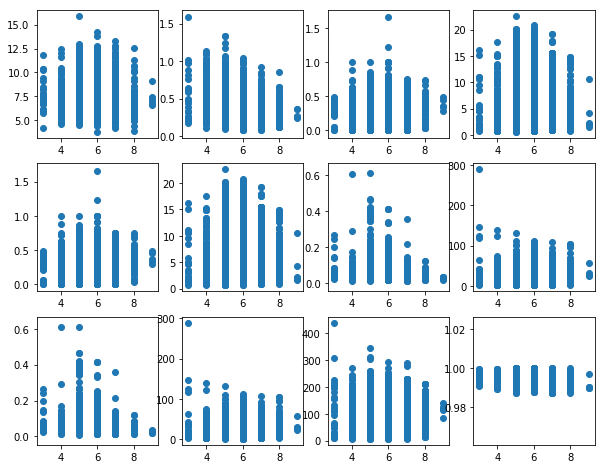

In [39]:
import matplotlib.pyplot as plt
import scipy.stats

f, ax = plt.subplots(3, 4, figsize = (10, 8))
for i in range (len(ax)):
    for j in range (len(ax[i])):
        ax[i][j].scatter(nparray[:,11],nparray[:,((i*(len(ax)-1)) + j )])

for i in range(11):
    print(i,':', scipy.stats.pearsonr(nparray[:,i], nparray[:,11]))


----

Because there are so many rows, it is difficult to derive a correlation. This is because the large quantity of results make the graphs a bit unclear. We computed the correlation coefficients, and we see that the amount of alcohol is by far the most important, as it has the highest value in the first argument of the coefficients. 

----

## 2.2 Visualizing the handwritten digits (4 points)

In this part of the exercise we will analyse the famous *mnist* handwritten digit dataset from: http://yann.lecun.com/exdb/mnist/.

> 2.2.1 (4pts)
1. Load zipdata.mat by using the loadmat function. There are two data sets containing handwritten digits: *testdata* and *traindata*. Here, we will only use *traindata*. The first column in the matrix *traindata* contains the digit (class) and the last 256 columns contain the pixel values.
2. Create the data matrix *X* and the class index vector *y* from the data. Remove
the digits with the class index 2-9 from the data, so only digits belonging to
the class 0 and 1 are analyzed. (remember logical indexing!) 
3. Visualize the first 10 digits as images. (take a look at the example code)
Next, compute the principal components (PCA) of the data matrix. Now, using the PCA model, create a new data matrix $Z$ by projecting $X$ onto the space spanned by the loadings $V$. The new data matrix should have 4 attributes corresponding to PC1-PC4.  Use subplotting to show the digits and their reconstructed counterparts in an orderly manner.
4. Reconstruct the initial data using PC1-PC4 into a new matrix called $W$. Visualize the first 10 digits as images for the reconstructed data and compare them with images for the original data.
5. Make a 4-by-4 subplot of scatter plots of each possible combination projection onto PC1 to PC4 (contained in $Z$) against each other. You can leave the diagonal blank.  Plot elements belonging to different classes in different colors. Add a legend to clarify which digit is shown in which color.
6. Make a 3-dimensional scatter plot of the projections onto the first three principal components PC1-PC3 (contained in $Z$). Plot elements belonging to different classes in different colors. Add a legend to clarify which digit is shown in which color.
7. What can you conclude from the various scatterplots about the PCs and the way they separate the data?

> **Hints:**
+ *The below example code can help you visualize digits as images.*
+ *See Assignment 1 if you can not recall how to compute a PCA.*
+ *Keep in mind that numpy.linalg.svd() returns the transposed **V<sup>T</sup>** matrix as output.*
+ *You can use **Z** = **Y** $*$ **V**[:,:4] to project the data onto the first four PCs. Don't forget that the $*$ operator does not perform matrix multiplication for numpy arrays!*
+ *To reconstruct the data from projection you can use the following formula: **W** = **Z**&ast;**V**[:,:4]<sup>T</sup> + **μ**. *
+ *You can take a look at the example_figure.ipynb notebook to see how you can easily plot multiple classes and color them correspondingly.* 
+ *It is advisable to make a for-loop to generate the 2D scatter plots, this saves a lot of time. It is an important skill to master if you want to easily modify your work later on, for example when correcting mistakes, or when you want to modify each plot in the same manner.* 


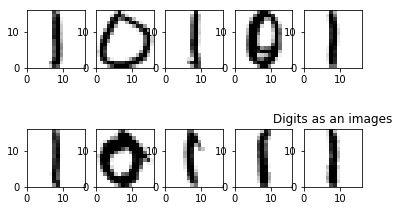

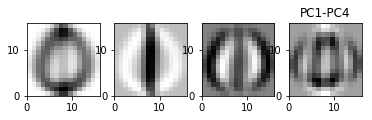

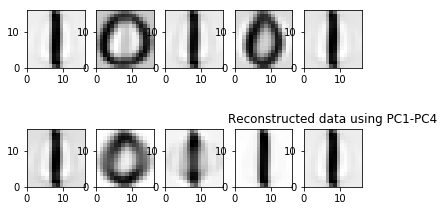

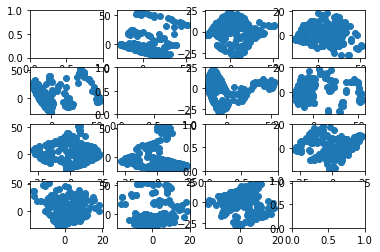

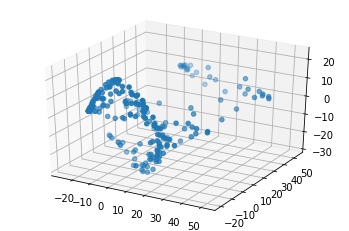

In [14]:
## Example code:
#------------------------------------------------
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from scipy.io import loadmat
from numpy import reshape
from mpl_toolkits.mplot3d import Axes3D

# Index of the digit to display
i = 0

# Load Matlab data file to python dict structure
mat_data = loadmat('./Data/zipdata.mat')

# Extract variables of interest
testdata = mat_data['testdata']
traindata = mat_data['traindata']
X = traindata[:,1:]
y = traindata[:,0]

ids = np.where(y <= 1)
X = X[ids]
y = y[ids]

i = 0
f, ax = plt.subplots(2,5)
for j in range(len(ax)):
    for k in range(len(ax[j])):
        I = np.reshape(X[i,:],(16,16))
        ax[j][k].imshow(I, extent=(0,16,0,16), cmap=cm.gray_r);
        i +=1
plt.title('Digits as an images');
plt.show()

X = np.transpose(X)
mean = X.mean(axis = 0)
X = X - mean
U,sv,Vt = np.linalg.svd(X)
V = Vt.transpose()
Z = X.dot(V[:,:4]) 
f,ax=plt.subplots(1,4)
plt.title("PC1-PC4")
for j in range(len(ax)):
    I = np.reshape(Z[:,j],(16,16))
    ax[j].imshow(I, extent=(0,16,0,16), cmap=cm.gray_r);
    
    
    
#in this part we reconstruct our data using PC1-PC4
i = 0
W = Z.dot(np.transpose(V[:,:4])) + mean
f, ax = plt.subplots(2,5)
W = np.transpose(W)
plt.title("Reconstructed data using PC1-PC4")
for j in range(len(ax)):
    for k in range(len(ax[j])):
        I = np.reshape(W[i,:],(16,16))
        ax[j][k].imshow(I, extent=(0,16,0,16), cmap=cm.gray_r);
        i = i + 1

#here we make our subplots
f, ax = plt.subplots(4, 4)
for i in range(4):
    for j in range(4):
        if i != j:
            ax[i][j].scatter(Z[:,i], Z[:,j]) 
            
#here we make our threedimensional subplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Z[:,0], Z[:,1], Z[:,2])
#------------------------------------------------

----
What can you conclude from the various scatterplots about the PCs and the way they separate the data?

Because we are not entirely sure about our subplots, we are not sure if we can give a good conclusion. Therefore we did not do it. We were not able to do the colouring. 


----



## 2.3 Probability and Statistics (1.5 points)
The aim of this exercise is to learn how to calculate basic statistics in python.
> 2.3.1 (0.3pts) A study of a very limited population of Aliens reveals the following number of body appendages (limbs):
<center>2,3,6,8,11,18</center>
i. Find the mean $m$ and the standard deviation $\sigma$ of this population.
+ *You can use the methods numpy.ndarray.mean() and numpy.ndarray.std() to calculate the mean and standard deviation.*

In [2]:
import numpy as np
a = np.array([2,3,6,8,11,18])
print('mean:', a.mean())
print('standard deviation:', a.std())

mean: 8.0
standard deviation: 5.385164807134504


> ii. (0.3pts) List all possible samples of two aliens without replacement, and find each mean. Do the same with samples of four aliens.
+ *You can use the method itertools.combinations(v,n) to find all possible samples of a vector v taking n elements at a time.*

In [3]:
from itertools import combinations
c2 = list(combinations(a,2))
print(c2)
c2means = list(map(lambda t: np.mean(t),c2))
print(c2means)

c4 = list(combinations(a,4))
print(c4)
c4means = list(map(lambda t: np.mean(t),c4))
print(c4means)

[(2, 3), (2, 6), (2, 8), (2, 11), (2, 18), (3, 6), (3, 8), (3, 11), (3, 18), (6, 8), (6, 11), (6, 18), (8, 11), (8, 18), (11, 18)]
[2.5, 4.0, 5.0, 6.5, 10.0, 4.5, 5.5, 7.0, 10.5, 7.0, 8.5, 12.0, 9.5, 13.0, 14.5]
[(2, 3, 6, 8), (2, 3, 6, 11), (2, 3, 6, 18), (2, 3, 8, 11), (2, 3, 8, 18), (2, 3, 11, 18), (2, 6, 8, 11), (2, 6, 8, 18), (2, 6, 11, 18), (2, 8, 11, 18), (3, 6, 8, 11), (3, 6, 8, 18), (3, 6, 11, 18), (3, 8, 11, 18), (6, 8, 11, 18)]
[4.75, 5.5, 7.25, 6.0, 7.75, 8.5, 6.75, 8.5, 9.25, 9.75, 7.0, 8.75, 9.5, 10.0, 10.75]


> iii. (0.3pts) Each of the means above is called a sample mean. Find the mean of all the sample means (denoted by $m_x$) and the standard
deviation of all the sample means (denoted by $\sigma_x$) for both
the *N=2* and *N=4* samples.

In [4]:
import math
print(np.mean(c4means))
print(np.mean(c2means))
print(np.std(c2means), np.array(c4means).std())



8.0
8.0
3.40587727318528 1.70293863659264


> iv. Verify the Central Limit Theorem: (i) (0.1pts) compare the population
mean with the mean of both sample means; (ii) (0.2pts) compare the population
standard deviation divided by the square root of the sample size
with the standard deviation of both sample means (i.e., does
$\sigma_x \approx \sigma/\sqrt{N}$). BTW, a better approximation for
small population sizes is $\sigma_x = \sigma / \sqrt{N} \times
\sqrt{(M-N)/(M-1)}$ with *M = 6* the size of the original

i) they're the same 


ii) $\sigma_x \approx 2.1984$

$ \sigma/\sqrt{N} \approx 1.7029$

So the standard deviation of the initial population is lower, meaning it is a better data set because the data points are more together.



> v. (0.3pts) Plot the distribution of the population and the distributions of both sample means using histograms. What happens to the shape of the sample means distribution as the sample size (N*) increases?

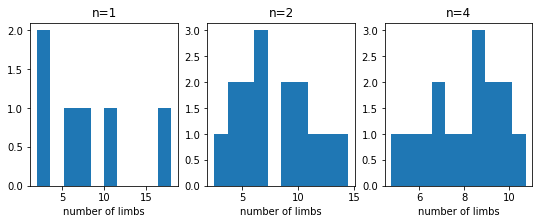

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,3))

plt.subplot(131)
plt.title('n=1')
plt.xlabel('number of limbs')
plt.hist(a)

plt.subplot(132)
plt.title('n=2')
plt.xlabel('number of limbs')
plt.hist(c2means)

plt.subplot(133)
plt.title('n=4')
plt.xlabel('number of limbs')
plt.hist(c4means)

plt.show()

----

For one, it gets a lot more detailed because you get more data points. For the initial population there are only 6 values, for population 2 and 4 both 15. Secondly the peak becomes higher ( more to the right ). And finally the range gets smaller, for n=1 the range is (2,18), for n=2 about (2,14) and n=4 about (3,11).

----